In [1]:
import pandas as pd
data = pd.read_csv('long-method-2020+2019+2018.csv')
data = data[['LOC_method', 'CC_method','is_long_method']]

In [2]:
data.head()

,LOC_method,CC_method,is_long_method
0,58,0,True
1,20,0,False
2,19,0,False
3,19,0,False
4,9,0,False


In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['is_long_method'] = encoder.fit_transform(data['is_long_method'])

In [4]:
data

,LOC_method,CC_method,is_long_method
0,58,0,1
1,20,0,0
2,19,0,0
3,19,0,0
4,9,0,0
...,...,...,...
1321,51,0,0
1322,42,0,0
1323,35,0,0
1324,44,0,0


In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [6]:
X = data[['LOC_method', 'CC_method']]
y = data ['is_long_method']

In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=42)
scaler.fit(X_train)

# Transform the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Dropout
from keras.layers import Dense,SimpleRNN,Embedding,Flatten

In [10]:
model = Sequential([
    SimpleRNN(50, input_shape=(X_train.shape[1], 1), activation='relu', return_sequences=True),
    Dropout(0.2),
    SimpleRNN(25, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 2, 50)          │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 50)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 25)             │         1,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,526 (17.68 KB)

 Trainable params: 4,526 (17.68 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])


In [13]:

# X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [14]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5830 - loss: 0.6865 - val_accuracy: 0.6730 - val_loss: 0.6393
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6711 - loss: 0.6419 - val_accuracy: 0.6855 - val_loss: 0.6004
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6856 - loss: 0.6037 - val_accuracy: 0.6730 - val_loss: 0.5678
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6904 - loss: 0.5817 - val_accuracy: 0.7421 - val_loss: 0.5477
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7094 - loss: 0.5565 - val_accuracy: 0.7484 - val_loss: 0.5315
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7335 - loss: 0.5303 - val_accuracy: 0.7421 - val_loss: 0.5191
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.5185 - val_accuracy: 0.7421 - val_loss: 0.5234
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7675 - loss: 0.5146 - val_accuracy: 0.7296 - val_loss

In [15]:
training_loss, training_accuracy = model.evaluate(X_train_scaled, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step - accuracy: 0.7543 - loss: 0.5011
Training Loss: 0.4991925358772278
Training Accuracy: 0.7547169923782349


In [16]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 623us/step - accuracy: 0.7828 - loss: 0.4851
Test Loss: 0.5015398263931274
Test Accuracy: 0.764595091342926


In [17]:
import matplotlib.pyplot as plt
#pip install matplotlib

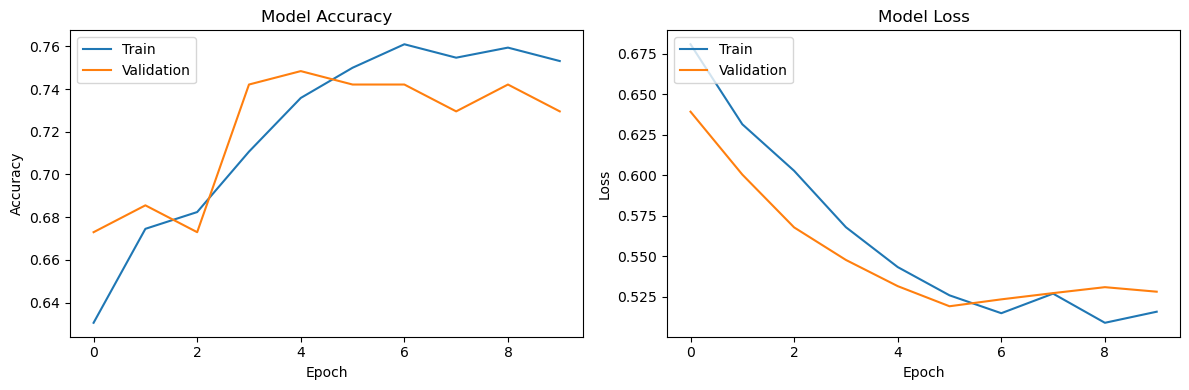

In [18]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

Another Approach

In [19]:

from keras.layers import SimpleRNN, Dense, Dropout, Bidirectional
from keras.optimizers import Adam

In [20]:

model = Sequential([
    Bidirectional(SimpleRNN(64, activation='relu', return_sequences=True), input_shape=(X_train.shape[1], 1)),
    Dropout(0.3),
    Bidirectional(SimpleRNN(32, activation='relu')),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])




/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 2, 128)         │         8,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 18,817 (73.50 KB)

 Trainable params: 18,817 (73.50 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:

history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.4486 - loss: 2.3583 - val_accuracy: 0.5472 - val_loss: 0.6335
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5318 - loss: 1.5093 - val_accuracy: 0.5535 - val_loss: 0.9561
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4535 - loss: 1.5109 - val_accuracy: 0.6038 - val_loss: 0.6288
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5134 - loss: 1.2925 - val_accuracy: 0.6038 - val_loss: 0.6279
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4981 - loss: 1.2714 - val_accuracy: 0.7484 - val_loss: 0.6366
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 1.0556 - val_accuracy: 0.6855 - val_loss: 0.6576
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5531 - loss: 1.0231 - val_accuracy: 0.7547 - val_loss: 0.6408
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5344 - loss: 1.1010 - val_accuracy: 0.5535 - val_loss

In [23]:
training_loss, training_accuracy = model.evaluate(X_train, y_train)

print(f'Training Loss: {training_loss}')
print(f'Training Accuracy: {training_accuracy}')

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - accuracy: 0.6068 - loss: 0.6677
Training Loss: 0.6564146280288696
Training Accuracy: 0.6440251469612122


In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.6249 - loss: 0.6646
Test Loss: 0.6625931859016418
Test Accuracy: 0.625235378742218


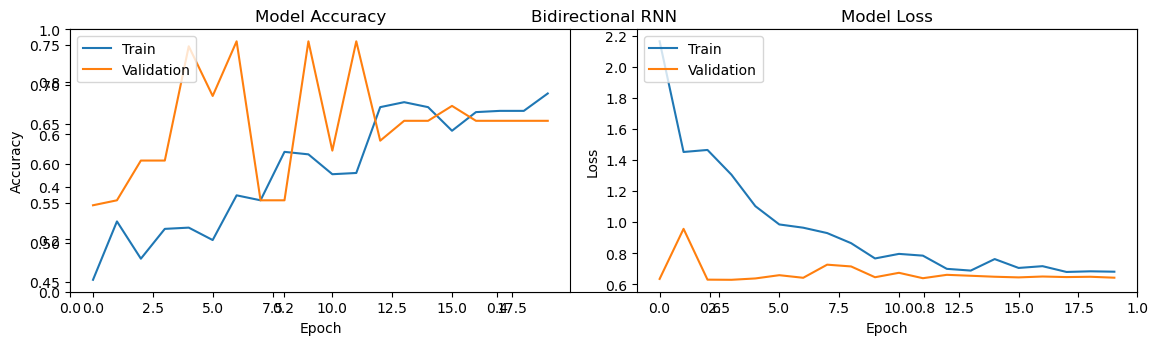

In [25]:
plt.figure(figsize=(12, 4))
plt.title('Bidirectional RNN')

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [26]:
# import joblib
# model.save('FeatureEnvyRNN.h5')
# joblib.dump(scaler, 'FeScalerR.pkl')

In [27]:
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import f1_score
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Recall: {recall}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Recall: 0.2318181818181818
Precision: 0.6296296296296297
F1 Score: 0.3388704318936877


In [28]:
import joblib
from tensorflow.keras.models import save_model

# Save the model in Keras format
save_model(model, 'lm_modelRNN.keras')

# Save the scaler
joblib.dump(scaler, 'lm_scalarRNN.pkl')


['lm_scalarRNN.pkl']

In [29]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
print("Keras version:", tf.keras.__version__)


TensorFlow version: 2.16.1
Keras version: 3.3.3


In [30]:
%pip show tensorflow
%pip show keras


Name: tensorflow
Version: 2.16.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 
Note: you may need to restart the kernel to use updated packages.
Name: keras
Version: 3.3.3
Summary: Multi-backend Keras.
Home-page: https://github.com/keras-team/keras
Author: Keras team
Author-email: keras-users@googlegroups.com
License: Apache License 2.0
Location: /opt/anaconda3/lib/python3.11/site-packages
Requires: absl-py, h5py, ml-dtypes, namex, numpy, optree, rich
Required-by: tensorflow
Note: you may need to restart the kernel to use up